In [5]:
import statsmodels.datasets.co2 as co2
import pmdarima as pm

from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
import pandas as pd

In [6]:
co2_data = co2.load().data
co2_data = co2_data.fillna(co2_data.interpolate())
train, test = train_test_split(co2_data.co2, train_size=2200)

t= pd.DataFrame(train)
t["ds"] = t.index
t["y"] = t.co2
t["unique_id"] = "co2"
t = t.drop(columns=["co2"])

In [8]:
sf = StatsForecast(models = [AutoARIMA(seasonal=True, season_length=52)], freq = 'W')

sf.fit(t)

pred = sf.predict(h=len(test)) 
pred.tail()

StatsForecast(models=[AutoARIMA])

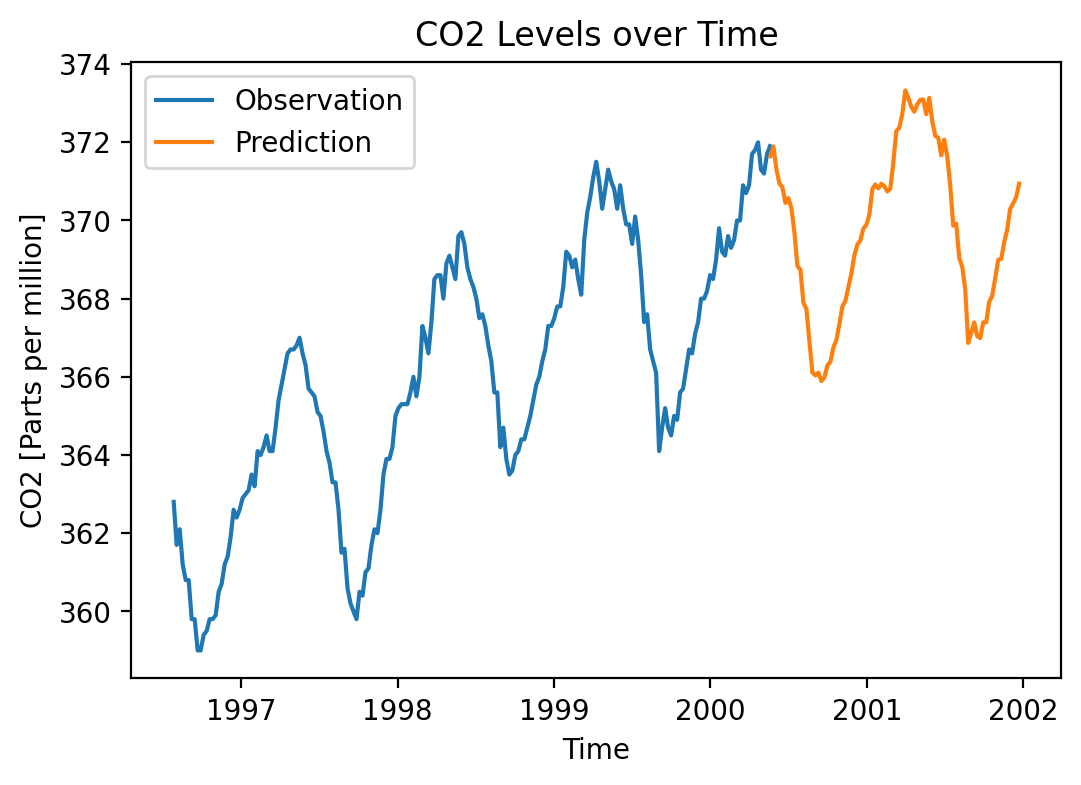

In [24]:
plt.figure(figsize=(6, 4), dpi=200)

plt.plot(t.ds[-200:], t.y[-200:],label='Observation')
plt.plot(pred.ds, pred.AutoARIMA , label='Prediction')
plt.title('CO2 Levels over Time')
plt.ylabel('CO2 [Parts per million]')
plt.xlabel('Time')
plt.legend()
plt.savefig('co2.png')
plt.show()